In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='http://bit.ly/drinksbycountry'
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [3]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [8]:
from google.colab import files
files.upload()

Saving beer-servings.csv to beer-servings (1).csv


{'beer-servings.csv': b",country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent\r\n0,Afghanistan,0,0,0,0,Asia\r\n1,Albania,89,132,54,4.9,Europe\r\n2,Algeria,25,0,14,0.7,Africa\r\n3,Andorra,245,138,312,12.4,Europe\r\n4,Angola,217,57,45,5.9,Africa\r\n5,Antigua & Barbuda,102,128,45,4.9,North America\r\n6,Argentina,,25,221,8.3,South America\r\n7,Armenia,21,179,11,3.8,Europe\r\n8,Australia,261,72,212,10.4,Oceania\r\n9,Austria,279,75,191,9.7,Europe\r\n10,Azerbaijan,21,46,5,1.3,Europe\r\n11,Bahamas,122,176,51,6.3,North America\r\n12,Bahrain,42,63,7,2,Asia\r\n13,Bangladesh,,,,,Asia\r\n14,Barbados,143,173,36,6.3,North America\r\n15,Belarus,142,373,42,14.4,Europe\r\n16,Belgium,295,84,212,10.5,Europe\r\n17,Belize,263,114,8,6.8,North America\r\n18,Benin,34,4,13,1.1,Africa\r\n19,Bhutan,23,0,0,0.4,Asia\r\n20,Bolivia,167,41,8,3.8,South America\r\n21,Bosnia-Herzegovina,76,173,8,4.6,Europe\r\n22,Botswana,173,35,35,5.4,Africa\r\n23,Brazil,245,145,16,7.2,South America\

In [10]:
data=pd.read_csv('beer-servings.csv')
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [15]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [26]:
num_cols=data[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']]

In [27]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [ ]:
#simple imputer

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [30]:
type(num_cols)

numpy.ndarray

In [31]:
num_cols=pd.DataFrame(num_cols,columns=[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']])

In [32]:
num_cols.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [34]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [35]:
data.drop(['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'],inplace=True, axis=1)

In [36]:
data.head()

,Unnamed: 0,country,continent
0,0,Afghanistan,Asia
1,1,Albania,Europe
2,2,Algeria,Africa
3,3,Andorra,Europe
4,4,Angola,Africa


In [37]:
data=pd.concat([num_cols,data],axis=1)
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",Unnamed: 0,country,continent
0,0.0,0.0,0.0,0.0,0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,1,Albania,Europe
2,25.0,0.0,14.0,0.7,2,Algeria,Africa
3,245.0,138.0,312.0,12.4,3,Andorra,Europe
4,217.0,57.0,45.0,5.9,4,Angola,Africa


In [38]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
Unnamed: 0                         0
country                            0
continent                          0
dtype: int64

In [39]:
data=pd.read_csv('beer-servings.csv')

In [40]:
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [41]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

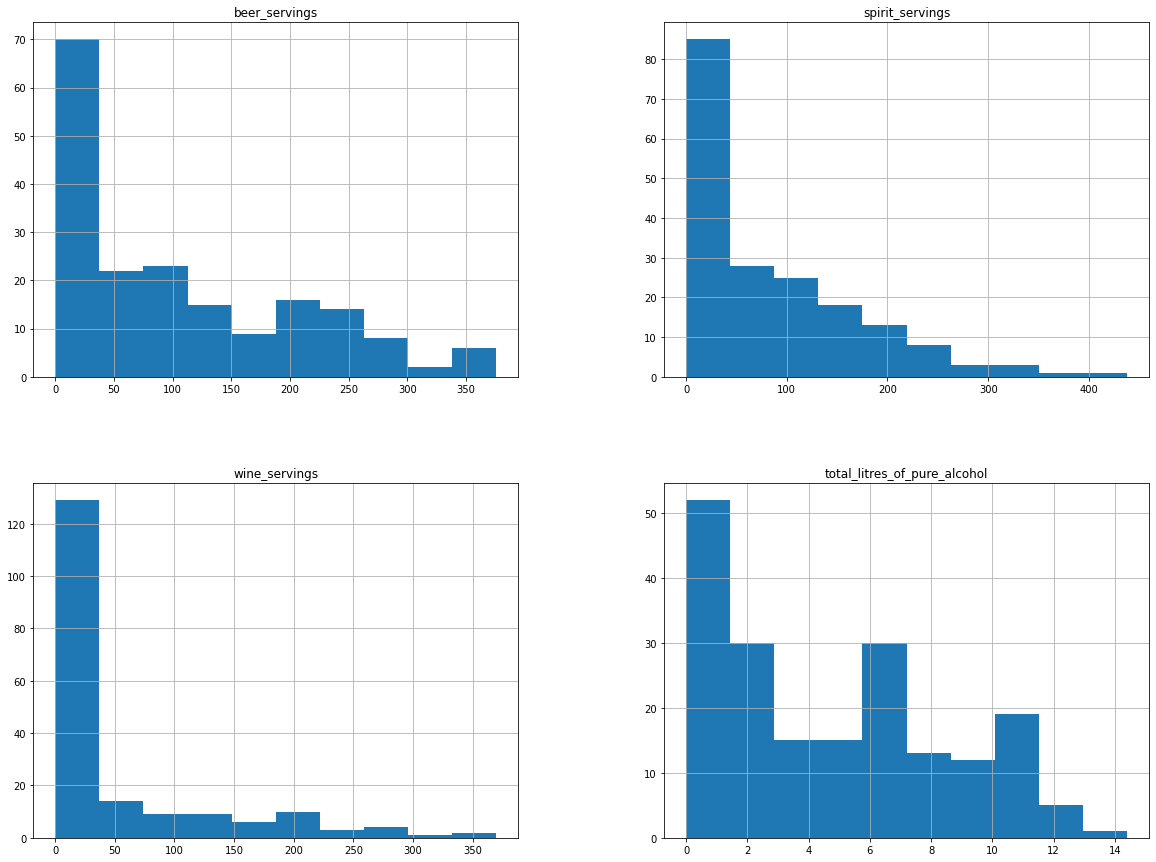

In [42]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [44]:
data.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [45]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [47]:
for col in ['spirit_servings','wine_servings', 'total_litres_of_pure_alcohol']:
  data[col]=data[col].fillna(data[col].median())

In [48]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
#Outliers

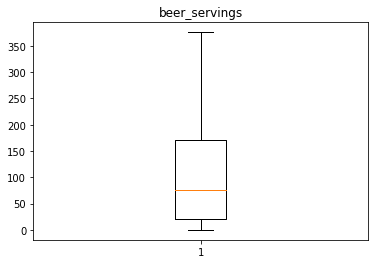

In [50]:
plt.boxplot(data['beer_servings'])
plt.title('beer_servings')
plt.show()

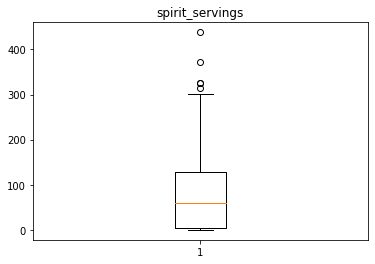

In [51]:
plt.boxplot(data['spirit_servings'])
plt.title('spirit_servings')
plt.show()

In [52]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q1

5.0

In [53]:
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')
Q3

128.0

In [54]:
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q2

60.0

In [56]:
data['spirit_servings'].median()

60.0

In [57]:
IQR=Q3-Q1
IQR

123.0

In [58]:
low_lim=Q1-(1.5*IQR)
upp_lim=Q3+(1.5*IQR)
low_lim

-179.5

In [59]:
upp_lim

312.5

In [60]:
outliers=[]
for i in data['spirit_servings']:
  if (i>upp_lim) or (i<low_lim):
    outliers.append(i)

In [61]:
outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

In [62]:
ind=data['spirit_servings']>upp_lim
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [64]:
data.drop([15, 68, 73, 141, 144])

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


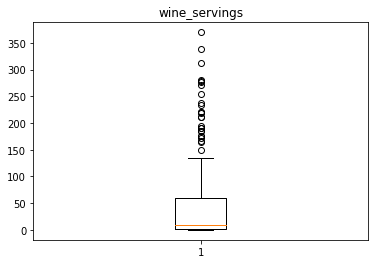

In [65]:
plt.boxplot(data['wine_servings'])
plt.title('wine_servings')
plt.show()

In [66]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
59.0


In [67]:
IQR=Q3-Q1
IQR

58.0

In [68]:
low_lim=Q1-(1.5*IQR)
upp_lim=Q3+(1.5*IQR)
print(low_lim)
print(upp_lim) 

-86.0
146.0


In [69]:
outliers=[]
for i in data['wine_servings']:
  if (i>upp_lim) or (i<low_lim):
    outliers.append(i)

In [70]:
outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [71]:
ind=data['wine_servings']>upp_lim
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

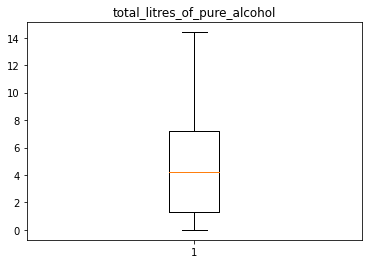

In [72]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('total_litres_of_pure_alcohol')
plt.show()

In [ ]:
##No outliers for total_litres_of_pure_alcohol